In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import qutip as qt 
from ECD_control.ECD_optimization.batch_optimizer import BatchOptimizer
from ECD_control.ECD_optimization.optimization_analysis import OptimizationAnalysis, OptimizationSweepsAnalysis
from ECD_control.ECD_pulse_construction.ECD_pulse_construction import *
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


Need tf version 2.3.0 or later. Using tensorflow version: 2.7.0



2022-05-03 01:14:35.042055: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1038] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-05-03 01:14:35.064183: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1038] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-05-03 01:14:35.064429: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1038] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-05-03 01:14:35.430281: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1038] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-05-03 01:14:35.430509: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1038] could n

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9912765913452572638
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 22004793344
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 651772131381459009
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

dentify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2022-05-03 01:14:35.430670: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1038] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-05-03 01:14:35.430707: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /device:GPU:0 with 20985 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
#The target oscillator state.
N =40
Fock = 3
psi_t = qt.basis(N,3) #target state

In [4]:
#Optimization of ECD Circuit parameters (betas, phis, and thetas)
#the optimization options
opt_params = {
'N_blocks' : 7, #circuit depth
'N_multistart' : 200, #Batch size (number of circuit optimizations to run in parallel)
'epochs' : 200, #number of epochs before termination
'epoch_size' : 10, #number of adam steps per epoch
'learning_rate' : 0.01, #adam learning rate
'term_fid' : 0.995, #terminal fidelitiy
'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
'beta_scale' : 3.0, #maximum |beta| for random initialization
'initial_states' : [qt.tensor(qt.basis(2,0),qt.basis(N,0))], #qubit tensor oscillator, start in |g> |0>
'target_states' : [qt.tensor(qt.basis(2,1), psi_t)], #end in |e> |target>.
'name' : 'Fock %d' % Fock, #name for printing and saving
'filename' : None, #if no filename specified, results will be saved in this folder under 'name.h5'
}
#note: optimizer includes pi pulse in every ECD step. However, final ECD step is implemented 
#in experiment as a displacement since the qubit and oscillator should be disentangled at this point.
#So, we ask the optimizer to end in |e> |target> instead of |g>|target>.

In [5]:
#create optimization object. 
#initial params will be randomized upon creation
opt = BatchOptimizer(**opt_params)

#print optimization info. 
opt.print_info()

2022-05-03 01:14:38.060496: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1038] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-05-03 01:14:38.061199: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1038] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-05-03 01:14:38.061845: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1038] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-05-03 01:14:38.062885: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1038] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-05-03 01:14:38.063602: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1038] could n

optimization_type: state transfer
N_multistart: 200
N_blocks: 7
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_etas: False
use_displacements: False
use_phase: False
name: Fock 3
comment: 
N_cav: 40
filename: Fock 3.h5

Best circuit parameters found:
betas:         [ 0.18831-0.64244j  0.14117+1.67763j -0.91947+2.25479j  1.60668-0.43663j
  0.21831-1.5508j   0.89049+0.47067j  0.27273-1.19897j]
alphas:        [0.+0.j]
phis (deg):    [   0.         4.97522 -122.74071 -132.48186  162.23747  160.77666
   67.35529]
etas (deg):    [89.99999 89.99999 89.99999 89.99999 89.99999 89.99999 89.99999]
thetas (deg):  [  -9.7335  -151.27766  -81.40299 -174.57217   47.4669   109.30825
   64.09943]
Max Fidelity:  0.187396




In [6]:
#run optimizer.
#note the optimizer can be stopped at any time by interrupting the python consle,
#and the optimization results will still be saved and part of the opt object.
#This allows you to stop the optimization whenever you want and still use the result.
opt.optimize()

Start time: 2022-05-03 01:14:44
 Epoch: 36 / 200 Max Fid: 0.995132 Avg Fid: 0.865187 Max dFid: 0.039000 Avg dFid: 0.001860 Elapsed time: 0:00:08.743537 Remaing time: 0:00:39.831670

 Optimization stopped. Term fidelity reached.

optimization_type: state transfer
N_multistart: 200
N_blocks: 7
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_etas: False
use_displacements: False
use_phase: False
name: Fock 3
comment: 
N_cav: 40
filename: Fock 3.h5

Best circuit parameters found:
betas:         [ 0.06016+1.5728j  -0.62583+0.50975j  1.30474-0.12586j  0.88368+1.51565j
  0.02054+0.45576j -0.3202 +0.75487j -0.00158+0.00076j]
alphas:        [0.+0.j]
phis (deg):    [   0.       -90.35691   90.41745   89.28392  -89.19627   89.34446
 -179.08014]
etas (deg):    [89.99999 89.99999 89.99999 89.99999 89.99999 89.99999 89.99999]
thetas (deg):  [ 90.07299 142.64859 -52.73264 122.70332  61.

'2022-05-03 01:14:44'

In [7]:
#can print info, including the best circuit found.
opt.print_info() 

optimization_type: state transfer
N_multistart: 200
N_blocks: 7
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_etas: False
use_displacements: False
use_phase: False
name: Fock 3
comment: 
N_cav: 40
filename: Fock 3.h5

Best circuit parameters found:
betas:         [ 0.06016+1.5728j  -0.62583+0.50975j  1.30474-0.12586j  0.88368+1.51565j
  0.02054+0.45576j -0.3202 +0.75487j -0.00158+0.00076j]
alphas:        [0.+0.j]
phis (deg):    [   0.       -90.35691   90.41745   89.28392  -89.19627   89.34446
 -179.08014]
etas (deg):    [89.99999 89.99999 89.99999 89.99999 89.99999 89.99999 89.99999]
thetas (deg):  [ 90.07299 142.64859 -52.73264 122.70332  61.59946  58.46091 -89.81232]
Max Fidelity:  0.995130




In [8]:
#can also get the best circuit parameters directly, could save this to a .npz file.
best_circuit =  opt.best_circuit()
betas = best_circuit['betas']
phis = best_circuit['phis']
thetas = best_circuit['thetas']
print(best_circuit)

{'fidelity': 0.9951296, 'betas': array([ 0.06015637+1.5727955e+00j, -0.62582606+5.0974530e-01j,
        1.3047355 -1.2585883e-01j,  0.8836812 +1.5156528e+00j,
        0.02054233+4.5576090e-01j, -0.32019562+7.5487232e-01j,
       -0.00157556+7.5748231e-04j], dtype=complex64), 'alphas': array([0.+0.j], dtype=complex64), 'phis': array([ 0.       , -1.5770257,  1.5780823,  1.5582983, -1.5567687,
        1.559355 , -3.125538 ], dtype=float32), 'etas': array([1.5707963, 1.5707963, 1.5707963, 1.5707963, 1.5707963, 1.5707963,
       1.5707963], dtype=float32), 'thetas': array([ 1.5720704,  2.4896877, -0.9203582,  2.141577 ,  1.0751135,
        1.0203354, -1.5675209], dtype=float32)}


In [9]:
#Analysis of the results. Can load the .h5 file.
#all data is stored as a timestamp in a .h5 file
#You can also specify which timestamp you are analyzing. Be defult, it will use the most recent optimization in the file.
#I  recommend using "HDFview" software to understand data structure
#filename = opt.filename
filename = 'Fock %d.h5' % Fock
analysis = OptimizationAnalysis(filename)
analysis.print_info() #we can print info of best circuit

N_blocks: 7
N_cav: 40
N_multistart: 200
alpha_scale: 1.0
beta_scale: 3.0
comment: 
dfid_stop: 1e-06
elapsed_time_s: 8.743537425994873
epoch_size: 10
epochs: 200
learning_rate: 0.01
name: Fock 3
no_CD_end: False
optimization_type: state transfer
term_fid: 0.995
termination_reason: term_fid
theta_scale: 3.141592653589793
use_displacements: False
use_etas: False
use_phase: False
filename: Fock 3.h5

Best circuit parameters found:
betas:         [ 0.06016+1.5728j  -0.62583+0.50975j  1.30474-0.12586j  0.88368+1.51565j
  0.02054+0.45576j -0.3202 +0.75487j -0.00158+0.00076j]
alphas:        [0.+0.j]
phis (deg):    [   0.       -90.35691   90.41745   89.28392  -89.19627   89.34446
 -179.08014]
thetas (deg):  [ 90.07299 142.64859 -52.73264 122.70332  61.59946  58.46091 -89.81232]
Max Fidelity:  0.995132




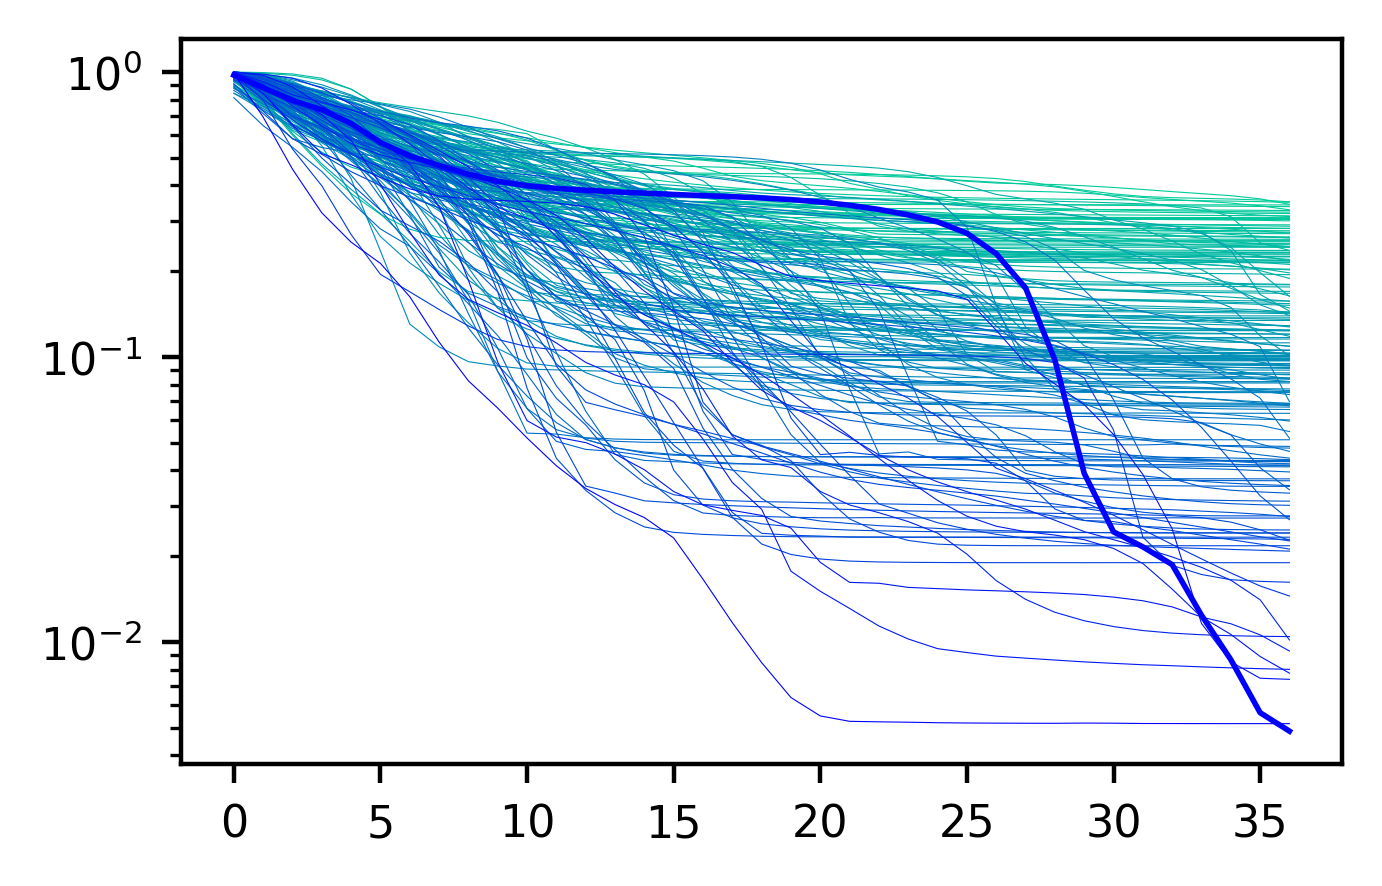

In [10]:
#We can plot the fidelities of the different parallel optimizations. 
# x axis is epoch
analysis.plot_fidelities()

In [11]:
#Can also get the "best circuit" from a loaded analysis object
best_circuit = analysis.best_circuit()
betas = best_circuit['betas']
phis = best_circuit['phis']
thetas = best_circuit['thetas']
print(best_circuit)

{'fidelity': 0.99513197, 'betas': array([ 0.06015637+1.5727955e+00j, -0.62582606+5.0974530e-01j,
        1.3047355 -1.2585883e-01j,  0.8836812 +1.5156528e+00j,
        0.02054233+4.5576090e-01j, -0.32019562+7.5487232e-01j,
       -0.00157556+7.5748231e-04j], dtype=complex64), 'alphas': array([0.+0.j], dtype=complex64), 'phis': array([ 0.       , -1.5770257,  1.5780823,  1.5582983, -1.5567687,
        1.559355 , -3.125538 ], dtype=float32), 'thetas': array([ 1.5720704,  2.4896877, -0.9203582,  2.141577 ,  1.0751135,
        1.0203354, -1.5675209], dtype=float32)}


In [12]:
#Now, we can take the parameters found (betas, phis, and thetas)
#and use them to produce a ECD oscillator and qubit pulse.
#This requies us to specify the calibrated experimental parameters.

#The following parameters for the oscillator will be used to build the oscillator pulse.
#Here, assume that a gaussian displacement pulse to alpha=1.0 has been calibrated.
storage_params = {
        "chi_kHz": 33, #dispersive shift in kHz
        "chi_prime_Hz": 1, #second order dispersive shift in Hz
        "Ks_Hz": 0, #Kerr correction not implemented here.
        "unit_amp": 0.01, #DAC amplitude (at maximum of pulse) for gaussian displacement to alpha=1.
        "sigma": 11, #oscillator displacement pulse sigma
        "chop": 4, #oscillator displacement pulse chop (number of sigmas to include in gaussian pulse)
    }

#In a similar way, the qubit pulse parameters will be specified by a calibrated pi pulse.
#unit_amp is the DAC amplitude (at maximum of pulse) for a calibrated gaussian pi pulse, with sigma and chop specified
qubit_params = {'unit_amp': 0.5, 'sigma': 6, 'chop': 4} #parameters for qubit pi pulse.


#creating the "Fake storage" and "Fake qubit" objects which are used
#for pulse cration
storage = FakeStorage(**storage_params)
qubit = FakeQubit(**qubit_params)

#The maximum displacement used during the ECD gates.
alpha_CD = 30
#Small delay to insert between oscillator and qubit pulses to ensure timing is okay.
buffer_time = 4

In [13]:
#From these calibrations, the storage and qubit objects calculate the
#conversion between DAC amplitude, and drive amplitude in MHz.
#so, [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz 
#and [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz.
#These parameters also represent the maximum drive amplitude,
#since the DAC max amplitude is 1 (assuming amplifiers don't saturate.)
print('Maximum oscillator drive amplitude: |epsilon|/2*pi < %.3f MHz' % storage.epsilon_m_MHz)
print('Maximum qubit drive amplitude: |Omega|/2*pi < %.3f MHz' % qubit.Omega_m_MHz)

Maximum oscillator drive amplitude: |epsilon|/2*pi < 690.790 MHz
Maximum qubit drive amplitude: |Omega|/2*pi < 40.468 MHz


In [14]:
#generating the oscillator and qubit pulses (epsilon and Omega)
#set 'chi_prime_correction = True' to correct for linear part of chi'
#final_disp = True will implement final ECD gate as a gaussian displacement instead of full ECD gate.
#This option is useful if the qubit and oscillator are disentangled after the gate.
pulse_dict = conditional_displacement_circuit(betas, phis, thetas, storage, qubit,
                     alpha_CD,buffer_time=buffer_time, kerr_correction = False, chi_prime_correction=True, final_disp=True, pad=True)

#The dictionary will contain the pulses, in DAC units.
#Also, the displacements used for each ECD gate (the "alphas")
cavity_dac_pulse, qubit_dac_pulse,alphas = pulse_dict['cavity_dac_pulse'], pulse_dict['qubit_dac_pulse'], pulse_dict['alphas']
print('alphas:')
print(alphas)

/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


alphas:
[30.1799891752502, 30.131083638271857, 30.1974379074359, 30.10638915560334, 23.836287915651713, 30.131542727348283]


Text(0.5, 0, 'ns')

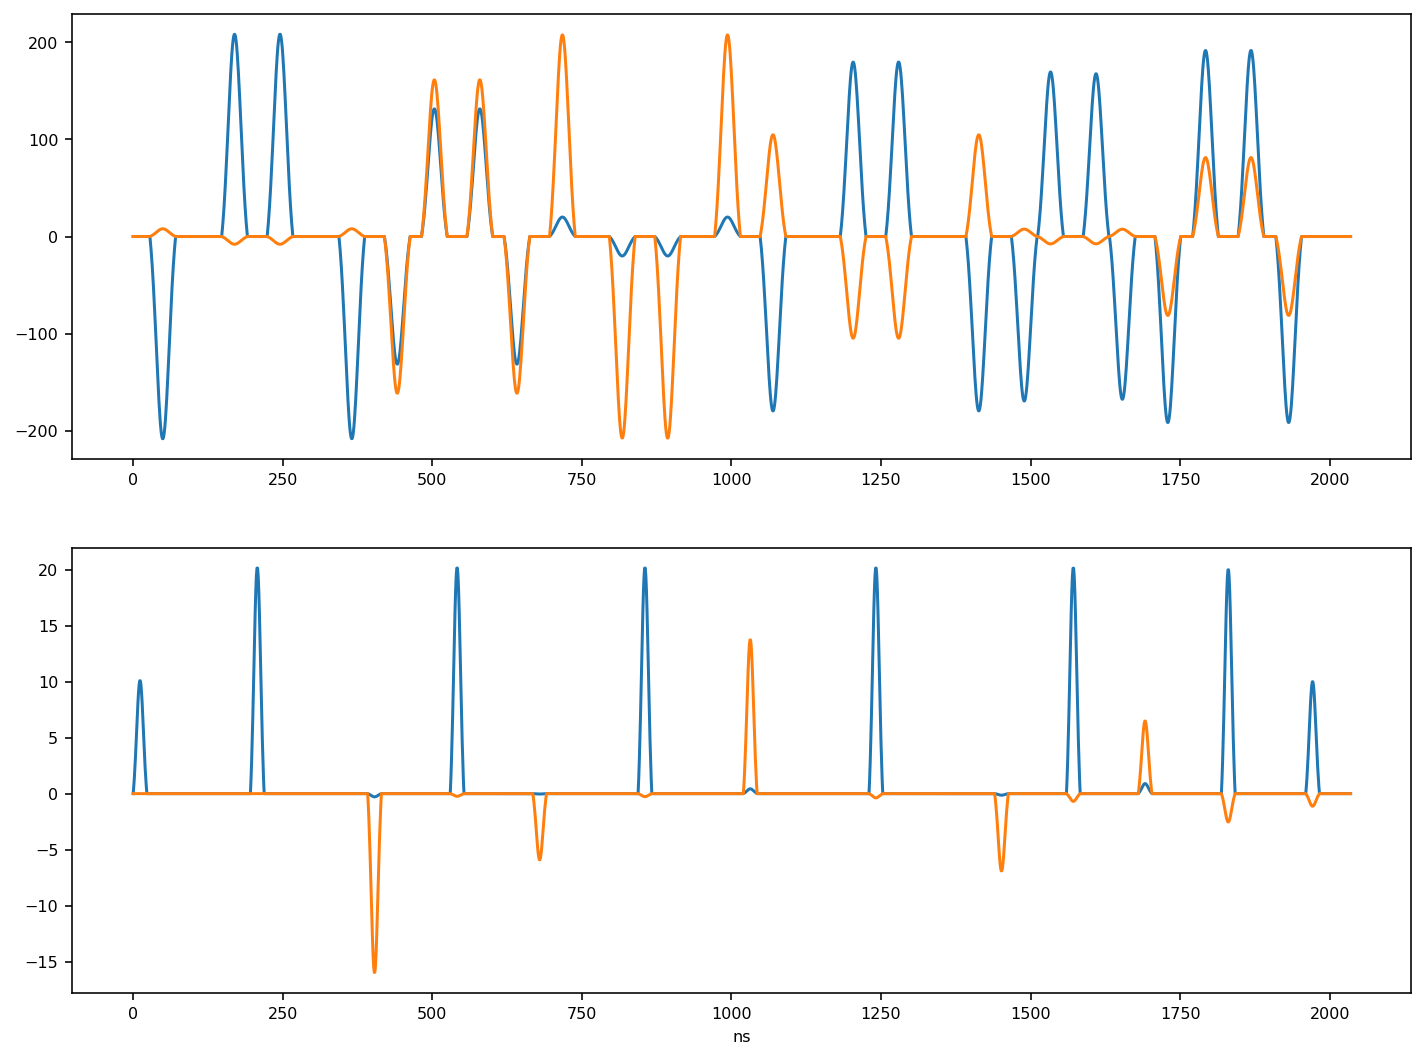

In [16]:
#plotting the pulse, in units of MHz. It could also be fed into a time-domain simulation.
fig, axs = plt.subplots(2,1)
axs[0].plot(np.real(storage.epsilon_m_MHz*cavity_dac_pulse))
axs[0].plot(np.imag(storage.epsilon_m_MHz*cavity_dac_pulse))
axs[1].plot(np.real(qubit.Omega_m_MHz*qubit_dac_pulse))
axs[1].plot(np.imag(qubit.Omega_m_MHz*qubit_dac_pulse))
plt.xlabel('ns')